In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

seaborn.set()  # Optional: Set a fancy plot style

In [2]:
%matplotlib inline

# Lecture 08: NumPy

## Essential Reference

### Jake VanderPlas.  *Python Data Science Handbook.*, Chapter 2  
### https://jakevdp.github.io/PythonDataScienceHandbook/02.00-introduction-to-numpy.html

# Data and Array Storage in Numpy

## Python Numbers Have a Lot of Metadata

A simple Python integer contains not only its value but information about its state.  

For example, the C implementation of a Python (long) integer contains the following:
``` C
struct _longobject {
    long ob_refcnt;
    PyTypeObject *ob_type;
    size_t ob_size;
    long ob_digit[1];
};
```
* **`ob_refcnt`**: A reference counter for autotmatic memory alloc/dealloc
* **`ob_type`**: Encodes the variable type
* **`ob_size`**: The size of the following data member
* **`ob_digit`**: The actual integer value

In this example, 32 bytes are needed to store an 8 byte integer.  

## Python Lists Have a Lot of Metadata

In a `list`, every element is a complete object with its own metadata.
* This allows a `list` to contain **heterogeneous** elements.
* However, the implementation requires more memory.
* Also, to access an element, Python must dereference **two pointers**.  

In a **homogeneous** array, much of the array metadata would be redundant.
* The implementation in NumPy requres less memory.
* To access an element, Python only needs to dereference **one pointer**.  

## Python Lists vs. NumPy Arrays

* A Python `list` is an object that points to a block of addresses.  Each of those points to an entire integer object.
* A NumPy `array` points to a block of simple integers.  

![alt text](Figures/array_vs_list.png "NumPy Array vs. Python List")

# Creating NumPy Arrays

## Creating Arrays from Sequences

* When given a sequence and no datatype specification, Python infers the datatype:

In [3]:
np.array([1, 4, 2, 5, 3])  # Infers int

array([1, 4, 2, 5, 3])

* Elements are upcast as necessary:

In [4]:
np.array([3.14, 4, 2, 3])  # Ints are upcast to floats

array([3.14, 4.  , 2.  , 3.  ])

* The `dtype` parameter can be used to explicitly set datatype:

In [5]:
np.array([1, 2, 3, 4], dtype='float32')  # Single-precision float

array([1., 2., 3., 4.], dtype=float32)

## Creating Single-Value Arrays

* **`np.zeros`**: An 10-element array filled with zeros.  See also:
    * `np.ones`: Creates and fills with ones
    * `np.full`: Creates and fills with a specified value 
    * `np.empty`: Creates unitialized values.  Risky!

In [6]:
np.zeros(10, dtype='int')

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Creating Arrays from Ranges

* **`np.range`**: Left-inclusive, right non-inclusive, with step size (similar to built-in  `range()`).
  * This can take floats, but handling endpoints may be inexact.  

In [7]:
np.arange(0, 20, 2)

array([0.])

In [8]:
np.arange(0, 1.25, 6)

array([0.])

* **`np.linspace`**: Creates $n$ evenly-spaced values, including endpoints by default

In [4]:
np.linspace(0, 1.25, 6)

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25])

## Multi-dimensional Arrays

* Nested lists create multi-dimensional arrays:

In [9]:
np.array([range(i, i + 3) for i in [2, 4, 6]])

array([[2, 3, 4],
       [4, 5, 6],
       [6, 7, 8]])

* When creating from scratch, we can specify a **shape**.  This is a $2 \times 3$ array.

In [10]:
np.full((2, 3), 298, dtype='float64')

array([[298., 298., 298.],
       [298., 298., 298.]])

## Multi-Dimensional Ranges
* [`np.meshgrid`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html) is often used to create coordinates in $n$-dimensional space

In [11]:
x, y = np.meshgrid(np.linspace(-2, 2, 5), 
                   np.linspace(-1, 1, 3))

In [12]:
x

array([[-2., -1.,  0.,  1.,  2.],
       [-2., -1.,  0.,  1.,  2.],
       [-2., -1.,  0.,  1.,  2.]])

In [13]:
y

array([[-1., -1., -1., -1., -1.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.,  1.]])

## Multi-Dimensional Ranges, cont
* [`matplotlib.pyplot.plt`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html) takes an array of x values and corresponding y values.  
* Shapes don't matter, as long as they match.  
* These arrays are flipped for clarity, so they visually match the plot.

In [14]:
np.flip(x, axis=0)

array([[-2., -1.,  0.,  1.,  2.],
       [-2., -1.,  0.,  1.,  2.],
       [-2., -1.,  0.,  1.,  2.]])

In [15]:
np.flip(y, axis=0)

array([[ 1.,  1.,  1.,  1.,  1.],
       [ 0.,  0.,  0.,  0.,  0.],
       [-1., -1., -1., -1., -1.]])

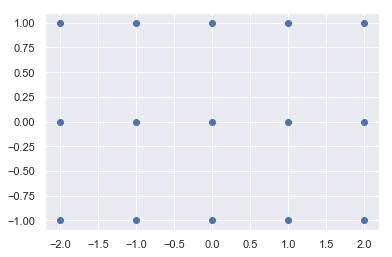

In [16]:
import matplotlib.pyplot as plt
plt.plot(x, y, 'ob')  # 'ob' is marker style (see docs)
plt.show()

## Arrays with Random Values

* **`np.random.random`**:  Uniform random distribution (default: between 0 and 1)

In [17]:
np.random.random((2,4))

array([[0.39922609, 0.30585614, 0.789087  , 0.27818869],
       [0.81908388, 0.43217016, 0.68609164, 0.52383283]])

* **`np.random.normal`**: Normal distribution with mean=0 and stddev=1

In [18]:
np.random.normal(0, 1, (2,3))

array([[ 2.21629312, -2.79029029, -0.20750896],
       [-1.3342705 , -0.22673881,  1.26796198]])

* **`np.random.randint`**: Random integers in the interval $[0, 10)$

In [19]:
np.random.randint(0, 10, (2,3))

array([[1, 5, 9],
       [0, 0, 4]])

## NumPy Data Types

Because NumPy is built in C, the NumPy types correspond to usual C data types (partial listing below):

| Data type	    | Description |
|---------------|-------------|
| ``bool``     | Boolean (True or False) stored as a byte |
| ``int8``      | Byte (-128 to 127)| 
| ``int16``     | Integer (-32768 to 32767)|
| ``int32``     | Integer (-2147483648 to 2147483647)|
| ``int64``     | Integer (-9223372036854775808 to 9223372036854775807)| 
| ``float16``   | Half precision float: sign bit, 5 bits exponent, 10 bits mantissa| 
| ``float32``   | Single precision float: sign bit, 8 bits exponent, 23 bits mantissa| 
| ``float64``   | Double precision float: sign bit, 11 bits exponent, 52 bits mantissa| 
| ``complex64`` | Complex number, represented by two 32-bit floats| 
| ``complex128``| Complex number, represented by two 64-bit floats| 

# Working with NumPy Arrays

### NumPy Array Attributes

In [11]:
np.random.seed(0)  # seed for reproducibility
x1 = np.random.randint(10, size=6)  # One-dimensional array
x2 = np.random.randint(10, size=(3, 4))  # Two-dimensional array
x3 = np.random.randint(10, size=(3, 4, 5))  # Three-dimensional array
x1

array([5, 0, 3, 3, 7, 9])

* ``ndim``: the number of dimensions
* ``shape``: the length of each dimension
* ``size``: the total number of elements
* ``dtype``: the datatype

In [10]:
print("x3 ndim: ", x3.ndim)
print("x3 shape:", x3.shape)
print("x3 size: ", x3.size)
print("dtype:", x3.dtype)

x3 ndim:  3
x3 shape: (3, 4, 5)
x3 size:  60
dtype: int32


## Array Indexing: 1D Arrays

The $i^{th}$ value (counting from zero) can be accessed just as with Python lists:

In [22]:
x1

array([5, 0, 3, 3, 7, 9])

In [23]:
x1[0], x1[4]

(5, 7)

In [24]:
x1[-1], x1[-2]

(9, 7)

## Array Indexing: Multi-dimensional Arrays

In a multi-dimensional array, items can be accessed using a comma-separated tuple of indices:

In [25]:
x2

array([[3, 5, 2, 4],
       [7, 6, 8, 8],
       [1, 6, 7, 7]])

In [26]:
x2[0, 0], x2[2, 0], x2[2, -1]

(3, 1, 7)

Values can also be modified using any of the above index notation:

In [27]:
x2[0, 0] = 12
x2

array([[12,  5,  2,  4],
       [ 7,  6,  8,  8],
       [ 1,  6,  7,  7]])

## Beware: Truncating and Downcasting

Because NumPy arrays are homogenous, assignments may trucate or downcast the given r-value:

In [28]:
print("dtype:", x1.dtype)
x1

dtype: int64


array([5, 0, 3, 3, 7, 9])

In [29]:
x1[0] = 3.14159  # this will be truncated!
x1

array([3, 0, 3, 3, 7, 9])

## Slicing: 1D Arrays


NumPy slicing follows the standard Python syntax with the same defaults: (``start=0``, ``stop=``*``size of dimension``*, ``step=1``).
``` python
x[start:stop:step]
```

In [30]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [31]:
x[:5]  # first five elements

array([0, 1, 2, 3, 4])

In [32]:
x[5:]  # elements after index 5

array([5, 6, 7, 8, 9])

In [33]:
x[4:7]  # middle sub-array

array([4, 5, 6])

In [34]:
x[::2]  # every other element

array([0, 2, 4, 6, 8])

## Slicing: Multi-dimensional Arrays

Every dimension can be sliced separately

In [35]:
x2

array([[12,  5,  2,  4],
       [ 7,  6,  8,  8],
       [ 1,  6,  7,  7]])

In [36]:
print(x2[0, :])  # first row of x2

[12  5  2  4]


In [37]:
print(x2[:, 0])  # first column of x2

[12  7  1]


In [38]:
x2[:2, :3]  # two rows, three columns

array([[12,  5,  2],
       [ 7,  6,  8]])

## Slices are References, not Copies

For a ``np.array``, a slice **refers to the original** (called **a view**).  Modifying ``x2_sub`` modifies both the view and the whole array:

In [39]:
x2_sub = x2[:2, :2]
print(x2); print(x2_sub)

[[12  5  2  4]
 [ 7  6  8  8]
 [ 1  6  7  7]]
[[12  5]
 [ 7  6]]


In [40]:
x2_sub[0, 0] = 99
print(x2); print(x2_sub)

[[99  5  2  4]
 [ 7  6  8  8]
 [ 1  6  7  7]]
[[99  5]
 [ 7  6]]


## How to Copy Slices
When needed, the ``copy()`` method can be used:

In [41]:
x2_sub_copy = x2[:2, :2].copy()
print(x2_sub_copy)

[[99  5]
 [ 7  6]]


If we now modify this subarray, the original array is not touched:

In [42]:
x2_sub_copy[0, 0] = 42
print(x2_sub_copy)
print(x2)

[[42  5]
 [ 7  6]]
[[99  5  2  4]
 [ 7  6  8  8]
 [ 1  6  7  7]]


## Reshaping of Arrays

The ``reshape`` method changes the **shape** of an existing array and returns a new array.  

The returned array will be a no-copy view of the initial array (unless precluded by odd memory layouts at runtime).  

The **size** of the initial array must match the **size** of the reshaped array. 

For example, this puts the numbers 1 through 9 in a $3 \times 3$ grid:

In [43]:
grid = np.arange(1, 10).reshape((3, 3))
print(grid)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


If a dimension is `-1`, its value is inferred from the others.  

In [44]:
grid = np.arange(1, 10).reshape((3, -1))
print(grid)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


## Adding an Extra Dimension

Often, you need to tranform a 1D vector to a column-vector or row of a matrix.  This can also be done with reshape. 

In [12]:
x = np.array([1, 2, 3])

In [46]:
x.reshape((-1, 1)) # Change it into a column vector

array([[1],
       [2],
       [3]])

In [47]:
x.reshape((1, -1))  # Change it into a matrix row

array([[1, 2, 3]])

## Joining 1D Arrays

``np.concatenate`` joins arrays along a specified axis.  The default is ``axis=0``.

For 1D arrays, this means that arrays will be concatenated end-to-end

In [48]:
x = np.array([1, 2, 3])
y = np.array([3, 2, 1])
np.concatenate([x, y])

array([1, 2, 3, 3, 2, 1])

Arbitrarily many arrays can be specified in one call:

In [49]:
z = [99, 99, 99]
print(np.concatenate([x, y, z]))

[ 1  2  3  3  2  1 99 99 99]


## Joining 2D and Higher-Dimension Arrays

When using ``np.concatenate`` with 2D arrays:
* Specifying ``axis=0`` will stack vertically.
* Specifying ``axis=1`` will stack horizontally.

This extends to arrays with arbitrarily-high dimensions.  But all operands must have the same number of dimensions.

In [50]:
grid1 = np.array([[1, 2, 3],
                  [4, 5, 6]])

grid2 = np.array([[100, 200, 300],
                  [400, 500, 600]])

In [51]:
np.concatenate([grid1, grid2], axis=0)

array([[  1,   2,   3],
       [  4,   5,   6],
       [100, 200, 300],
       [400, 500, 600]])

In [52]:
np.concatenate([grid1, grid2], axis=1)

array([[  1,   2,   3, 100, 200, 300],
       [  4,   5,   6, 400, 500, 600]])

## Joining with ``vstack`` and ``hstack``

The functions ``np.vstack`` (vertical stack) and ``np.hstack`` (horizontal stack) can be **clearer and more versatile** than ``np.concatenate``

For example, this use of ``np.vstack`` could not be done with ``np.concatenate([x, grid], axis=0)``, since the operands don't have the same number of dimensions.  

In [53]:
x = np.array([1, 2, 3])
grid = np.array([[9, 8, 7],
                 [6, 5, 4]])

np.vstack([x, grid])

array([[1, 2, 3],
       [9, 8, 7],
       [6, 5, 4]])

In [54]:
y = np.array([[99],
              [99]])
np.hstack([grid, y])

array([[ 9,  8,  7, 99],
       [ 6,  5,  4, 99]])

## Splitting Arrays
``np.split`` takes a sequence of splitpoints and an axis to split along (default `axis=0`).  There are corresponding ``np.hsplit`` and ``np.vsplit`` functions, as well.  

In [55]:
x = [1, 2, 3, 99, 99, 3, 2, 1]
x1, x2, x3 = np.split(x, [3, 5])
print(x1, x2, x3)

[1 2 3] [99 99] [3 2 1]


## Splitting Arrays, cont.

This splits a 2D array along axis 0.  

In [19]:
grid = np.arange(20).reshape((5, 4))
grid

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [57]:
subarrays = np.split(grid, [3, 4])
print(*subarrays, sep="\n\n")

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

[[12 13 14 15]]

[[16 17 18 19]]


## Splitting Arrays, cont.

This splits a 2D array along axis 1.  

In [58]:
subarrays = np.split(grid, [1,2], axis=1)
print(*subarrays, sep="\n\n")

[[ 0]
 [ 4]
 [ 8]
 [12]
 [16]]

[[ 1]
 [ 5]
 [ 9]
 [13]
 [17]]

[[ 2  3]
 [ 6  7]
 [10 11]
 [14 15]
 [18 19]]


In [20]:
grid

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

# Vectorized Operations in NumPy

## Introducing Ufuncs

NumPy implements **universal functions** or **unfuncs** that apply an operation to all elements in an array.  

The motivation is not just simple syntax.  The primary motivation is **performance**.  

In [59]:
x = np.arange(4, dtype=int)
print("x + 5 =", x + 5)
print("x * 2 =", x * 2)
print("x / 2 =", x / 2)
print("3^x   =", np.power(3, x))
# ...and many more...

x + 5 = [5 6 7 8]
x * 2 = [0 2 4 6]
x / 2 = [0.  0.5 1.  1.5]
3^x   = [ 1  3  9 27]


## Why Python Loops are Slow

Consider this function, which uses a `for` loop to populate a NumPy array.  

In [60]:
import numpy as np
np.random.seed(0)

def compute_reciprocals(values):
    output = np.empty(len(values))
    for i in range(len(values)):
        output[i] = 1.0 / values[i]
    return output
        
values = np.random.randint(1, 10, size=5)
compute_reciprocals(values)

array([0.16666667, 1.        , 0.25      , 0.25      , 0.125     ])

## Why Python Loops are Slow, cont.

Consider how this performance compares to the peak FLOPS of a 3 GHz processor.  

In [61]:
big_array = np.random.randint(1, 100, size=1000000)
%timeit compute_reciprocals(big_array)

1.64 s ± 12 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Here, the performance bottlenecks are **type-checking** and **function dispatches**:
* Each time the reciprocal is computed, Python first examines the object's type and does a dynamic lookup of the correct function to use for that type.
* In a statically-typed and compiled language, this type specification would be known before the code executes.

## Why Python Comprehensions are Also Slow

In this case, a comprehension does not perform better than a ``for`` loop.

The comprehension still performs the underlying type-checking and function dispatches for each reciprocal.

In [62]:
def compute_reciprocals_compr(values):
    return np.array([1.0 / n for n in values])

big_array = np.random.randint(1, 100, size=1000000)
%timeit compute_reciprocals_compr(big_array)

1.55 s ± 6.93 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Why UFuncs are Faster

NumPy provides interfaces to statically typed, compiled routines that can circumvent type-checking/dispatching. 

These are generally known as **vectorized** operations.  NumPy calls it implementations **universal functions** (or ufuncs).  Here, we compare the ufunc that is run by the `/` operator.  

In [63]:
print(compute_reciprocals(values))
print(1.0 / values)

[0.16666667 1.         0.25       0.25       0.125     ]
[0.16666667 1.         0.25       0.25       0.125     ]


The ufunc is between 100 and 1000 times faster than the Python loop/comprehension.

In [64]:
big_array = np.random.randint(1, 100, size=1000000)
%timeit (1.0 / big_array)

1.07 ms ± 12 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Arithmetic Operators Implemented as Ufuncs

NumPy implements ufuncs for several infix (``+``, ``-``, ``*``, ``/``, ``//``, ``**``, ``%``, ``@``) and unary (``-``) operations for arrays.  

Each operator is a wrapper around a NumPy function. E.g, the ``+`` operator is a wrapper for ``np.add``:

In [65]:
x = np.arange(4)
np.add(x, 2)

array([2, 3, 4, 5])

The ufuncs can be arbitrarily combined and respect the order of operations.  

In [66]:
-(0.5*x + 1) ** 2

array([-1.  , -2.25, -4.  , -6.25])

## Arithmetic Operators Implemented as Ufuncs, cont.

| Operator	    | Equivalent ufunc    | Description                           |
|---------------|---------------------|---------------------------------------|
|``+``          |``np.add``           |Addition (e.g., ``1 + 1 = 2``)         |
|``-``          |``np.subtract``      |Subtraction (e.g., ``3 - 2 = 1``)      |
|``-``          |``np.negative``      |Unary negation (e.g., ``-2``)          |
|``*``          |``np.multiply``      |Multiplication (e.g., ``2 * 3 = 6``)   |
|``/``          |``np.divide``        |Division (e.g., ``3 / 2 = 1.5``)       |
|``//``         |``np.floor_divide``  |Floor division (e.g., ``3 // 2 = 1``)  |
|``**``         |``np.power``         |Exponentiation (e.g., ``2 ** 3 = 8``)  |
|``%``          |``np.mod``           |Modulus/remainder (e.g., ``9 % 4 = 1``)|
|``@``          |``np.matmul``        |Matrix multiplication (Python 3.5+)    |

Boolean/bitwise ufuncs will covered when we discuss Boolean indexing and masking.  

## The Matrix Infix Operator: `@`

* [PEP 465](https://www.python.org/dev/peps/pep-0465/) proposed the matrix multiplication infix operator, `@`.
* Was implemented in Python3 3.5
* No usages in the standard library (e.g., not implemented for lists or nested lists)
* Introduced for the benefit of duck-typing in third-party numerical libraries.

## Multiplying Two Matrices

In [67]:
m1 = np.array([[1, 2, 3],
               [4, 5, 6],
               [7, 8, 9]])

m2 = np.array(([10, 11, 12],
               [13, 14, 15],
               [16, 17, 18]))

In [68]:
m1 @ m2

array([[ 84,  90,  96],
       [201, 216, 231],
       [318, 342, 366]])

## Multiplying Two Vectors

Multiplying two vectors yields the dot product

In [69]:
v1 = np.array([-10, 11, -12])
v2 = np.array([13, 14, 15])

In [70]:
v1 @ v2

-156

## Multiplying a Matrix and a Vector

When vector is **left** operand, it is treated as **row** vector

In [71]:
v1 @ m1
## v1 is 1*3 m1 is 3*3

array([-50, -61, -72])

When vector is **right** operand, it is treated as **column** vector

In [72]:
m1 @ v1

## v1 is 3*1, m1 is 3*3

array([-24, -57, -90])

## Non-Operator Arithmetic Functions

* **Absolute value**: ``np.abs``
* **Trigonometric funcs**: ``np.sin``, ``np.cos``, ``np.tan``, ``np.arcsin``, ``np.arccos``, ``np.arctan``
* **Exponentials**: ``np.exp``, ``np.exp2``, ``np.power``
* **Logs**: ``np.log``, ``np.log2``, ``np.nog10``
* **Reductions**:  Covered next!
* **Special funtions from ``scipy.special``**: ``gamma``, ``gammaln``, ``beta``, ``erf``, ``erfc``, ``erfinv``

And many many more!

## Specifying Destination for Results

* The way we've been using ufuncs, we have implictly created new array objects for the results.  
* Using the ``out`` argument, we can specify an exisiting object for the result.
* Typically not necessary:  Memory is cheap and usually not the performance-limiting

In [73]:
x = np.arange(5)
y = np.empty(5)
np.multiply(x, 10, out=y)
print(y)

[ 0. 10. 20. 30. 40.]


The destination may also be an array section:

In [74]:
y = np.zeros(10)
np.power(2, x, out=y[::2])
print(y)

[ 1.  0.  2.  0.  4.  0.  8.  0. 16.  0.]


This requires less memory than ``y[::2] = 2 ** x``.  Why?

# Aggregations: Min, Max, etc.

## Summing the Values in an Array

The built-in ``sum()`` function can understand a NumPy ``array``.  However, ``np.sum()`` is much faster.  

In [75]:
big_array = np.random.rand(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array)

69.8 ms ± 494 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
282 µs ± 2.39 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


``np.sum`` is also aware of multiple array dimensions (among other capabilities)

## Minimum and Maximum

Similarly, NumPy provides ``np.max`` and ``np.min``, which out-perform the built-in ``min`` and ``max`` functions

In [76]:
%timeit min(big_array)
%timeit np.min(big_array)

49.5 ms ± 275 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
309 µs ± 1.76 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


You can also call the corresponding `array` methods

In [77]:
print(big_array.min(), big_array.max(), big_array.sum())

2.067514368597756e-07 0.9999992772471815 499858.6358374474


## Multi dimensional Aggregates

You can sum/max/min over columns or rows using the ``axis`` parameter. 

The ``axis`` keyword specifies the *dimension of the array that will be collapsed*, rather than the dimension that will be returned. 

In [78]:
M = np.random.random((3, 4))
print(M)

[[0.8159363  0.27441054 0.92453523 0.3022338 ]
 [0.07027591 0.84253225 0.91449881 0.30140364]
 [0.3308293  0.83289801 0.34107185 0.48145815]]


In [79]:
M.max(axis=0)  # Collapse dimension 0, aggregate each column

array([0.8159363 , 0.84253225, 0.92453523, 0.48145815])

In [80]:
M.max(axis=1)  # Collapse dimension 1, aggregate each row

array([0.92453523, 0.91449881, 0.83289801])

## Other Aggregation Functions

Most of these provide an `NaN`-safe version that ignores missing values (`numpy.nan`)

|Function Name      |   NaN-safe Version  | Description                                   |
|-------------------|---------------------|-----------------------------------------------|
| ``np.sum``        | ``np.nansum``       | Compute sum of elements                       |
| ``np.prod``       | ``np.nanprod``      | Compute product of elements                   |
| ``np.mean``       | ``np.nanmean``      | Compute mean of elements                      |
| ``np.std``        | ``np.nanstd``       | Compute standard deviation                    |
| ``np.var``        | ``np.nanvar``       | Compute variance                              |
| ``np.min``        | ``np.nanmin``       | Find minimum value                            |
| ``np.max``        | ``np.nanmax``       | Find maximum value                            |
| ``np.argmin``     | ``np.nanargmin``    | Find index of minimum value                   |
| ``np.argmax``     | ``np.nanargmax``    | Find index of maximum value                   |
| ``np.median``     | ``np.nanmedian``    | Compute median of elements                    |
| ``np.percentile`` | ``np.nanpercentile``| Compute rank-based statistics of elements     |
| ``np.any``        | N/A                 | Evaluate whether any elements are true        |
| ``np.all``        | N/A                 | Evaluate whether all elements are true        |

## Example: What is the Average Height of US Presidents?

*president_heights.csv* lists Presidents' heights:

In [81]:
!head -4 president_heights.csv

order,name,height(cm)
1,George Washington,189
2,John Adams,170
3,Thomas Jefferson,189


We use [`numpy.loadtxt`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html) to load the "height" column into an array.

In [82]:
conv = 2.54 * 12 # convert from cm to ft
heights = np.loadtxt('president_heights.csv', 
                  delimiter=',', 
                  skiprows=1,
                  usecols=2) / conv
heights

array([6.2007874 , 5.57742782, 6.2007874 , 5.34776903, 6.00393701,
       5.61023622, 6.06955381, 5.51181102, 5.67585302, 6.00393701,
       5.67585302, 5.67585302, 5.74146982, 5.83989501, 6.00393701,
       6.332021  , 5.83989501, 5.67585302, 5.70866142, 6.00393701,
       6.00393701, 5.51181102, 5.57742782, 5.83989501, 5.97112861,
       5.90551181, 6.00393701, 5.83989501, 5.97112861, 6.167979  ,
       5.74146982, 5.87270341, 6.00393701, 6.332021  , 5.97112861,
       6.00393701, 5.80708661, 6.06955381, 6.167979  , 6.167979  ,
       5.97112861, 6.06955381])

## Example: Height of US Presidents, cont.

Now that we have this data array, we can compute a variety of summary statistics:

In [83]:
print("Mean height:       ", heights.mean())
print("Standard deviation:", heights.std())
print("Minimum height:    ", heights.min())
print("Maximum height:    ", heights.max())

Mean height:        5.896919135108113
Standard deviation: 0.2274226851294584
Minimum height:     5.347769028871391
Maximum height:     6.332020997375328


We can also compute quantiles:

In [84]:
print("25th percentile:   ", np.percentile(heights, 25))
print("Median:            ", np.median(heights))
print("75th percentile:   ", np.percentile(heights, 75))

25th percentile:    5.716863517060368
Median:             5.971128608923885
75th percentile:    6.003937007874016


## Example: Height of US Presidents, cont.

Matplotlib provides simple functions for plotting data.  

In [85]:
%matplotlib inline
import matplotlib.pyplot as plt


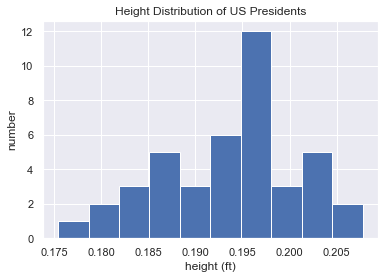

In [86]:
plt.hist(heights / conv)  # Plot a histogram
plt.title('Height Distribution of US Presidents')
plt.xlabel('height (ft)')
plt.ylabel('number');
plt.show()

# Introducing Broadcasting
## Applying Infix Ufuncs to Differently-Shaped Operands

## Broadcasting a Scalar

* Broadcasting allows binary operations to be performed on operands of different shapes
* When broadcasting a scalar, it is applied elementwise.  
* Conceptually, this resembles adding ``a + [5, 5, 5]``.  However, with broadcasting, the array ``[5, 5, 5]`` is never constructed.  

In [87]:
a = np.array([0, 1, 2])
a + 5

array([5, 6, 7])

## Broadcasting a Row Vector

* Consider adding a row vector `a` to matrix `M`
* Here, `a` is broadcast on dimension 0 ("downward")

In [88]:
M = np.array([[1, 2, 3],
              [4, 5, 6]])
a = np.array([70, 80, 90])

In [89]:
a + M

array([[71, 82, 93],
       [74, 85, 96]])

* Unlike matmul, the vector's shape is not re-interpreted if it is the right- or left-hand operand

In [90]:
M + a

array([[71, 82, 93],
       [74, 85, 96]])

## Broadcasting a Column Vector

* Consider adding a column vector `b` to matrix `M`
* Here, `b` is broadcast on dimension 1 ("across")

In [2]:
import numpy as np
M = np.array([[1, 2, 3],
              [4, 5, 6]])
b = np.array([[70],
              [80]])

In [4]:
b + M

array([[71, 72, 73],
       [84, 85, 86]])

In [5]:
M + b

array([[71, 72, 73],
       [84, 85, 86]])

## Broadcasting both a Row and Column

Both ``a`` and ``b`` are broadcast to a shape that is common to ``a`` and ``b``.  

In [94]:
a = np.array([1, 2, 3])
b = np.array([[40],
              [50]])

In [95]:
a + b

array([[41, 42, 43],
       [51, 52, 53]])

## Broadcasting Mismatch!

The row ``c`` cannot be broadcast across dimension 0 of ``M``

In [96]:
M = np.array([[0, 1],
              [2, 3],
              [4, 5]])
c = np.array([70, 80, 90])

In [97]:
M + c

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

## Broadcasting Visualized

The light boxes **conceptually** represent new elements for broadcasted values

The new elements are notactually allocated in the course of the operation.  

![Broadcasting Visual](Figures/02.05-broadcasting.png)

## Rules of Broadcasting

Broadcasting in NumPy follows a strict set of rules to determine the interaction between the two arrays:

- **Rule 1:** If the two arrays differ in their number of dimensions, the ``shape`` of the one with fewer dimensions is *padded* with ones on its leading (left) side.
- **Rule 2:** If the ``shape`` of the two arrays does not match in a dimension, the array with ``shape`` equal to 1 in that dimension is stretched to match the other shape.
- **Rule 3:** If in any dimension the sizes disagree and neither is equal to 1, an error is raised.

## Rules for Broadcasting a Row Vector

In [98]:
M = np.array([[1, 2, 3],
              [4, 5, 6]])
a = np.array([70, 80, 90])

* Begining shapes are:
  - ``M.shape = (2, 3)``
  - ``a.shape = (3,)``

* Rule 1: ``a`` has fewer dimensions, so pad it on left
  - ``M.shape -> (2, 3)``
  - ``a.shape -> (1, 3)``

* Rule 2: Dimension 0 of ``b`` disagrees, so we stretch it on dimension 0 ("down"):
  - ``M.shape -> (2, 3)``
  - ``a.shape -> (2, 3)``
* Rule 3: Ending shapes match!

## Rules for Broadcasting a Column Vector

In [99]:
M = np.array([[1, 2, 3],
              [4, 5, 6]])
b = np.array([[70],
              [80]])

* Begining shapes are:
  - ``M.shape = (2, 3)``
  - ``b.shape = (2, 1)``

* Rule 1: They're already the same number of dimensions

* Rule 2: Dimension 1 of ``b`` disagrees, so we stretch it on dimension 1 ("across"):
  - ``M.shape -> (2, 3)``
  - ``b.shape -> (2, 3)``
* Rule 3: Ending shapes match!

## Rules for Broadcasting both a Row and Column

In [100]:
a = np.array([1, 2, 3])
b = np.array([[40],
              [50]])

* Begining shapes are:
  - ``a.shape = (3,)``
  - ``b.shape = (2, 1)``

* Rule 1: ``a`` has fewer dimensions, so we pad it on left
  - ``a.shape = (1, 3)``
  - ``b.shape = (2, 1)``

* Rule 2: Stretch ``a`` on dimension 0 and ``b`` on dimension 1
  - ``M.shape -> (2, 3)``
  - ``b.shape -> (2, 3)``
* Rule 3: Ending shapes match!

### Broadcasting Example 3:  Mismatch!

In [101]:
M = np.array([[0, 1],
              [2, 3],
              [4, 5]])
c = np.array([70, 80, 90])

* Begining shapes are:
  - ``M.shape = (3, 2)``
  - ``c.shape = (3,)``
* Rule 1: ``c`` has fewer dimensions, so pad it on left:
  - ``M.shape -> (3, 2)``
  - ``c.shape -> (1, 3)``
* Rule 2: ``c`` is stretched along dimension 0
  - ``M.shape -> (3, 2)``
  - ``c.shape -> (3, 3)``
* Rule 3:  Shape mismatch!

Reference: [Computation on NumPy Arrays: Universal Functions](02.03-Computation-on-arrays-ufuncs.ipynb).

# Broadcasting in Practice

## Example 6:  Centering data series

* To center a series of data, you subtract its mean from each of its entries.  This produces a series with mean == 0.  

* Example:
  - 3 variables (columns, series, etc.)
  - 10000 observations (rows, entries, etc.)

In [169]:
col_shape = (10000,1)
X = np.hstack([np.random.uniform(high=2, size=col_shape),
               np.random.uniform(high=4, size=col_shape),
               np.random.uniform(high=8, size=col_shape)])
X

array([[1.59948183, 1.6262024 , 5.9849206 ],
       [0.54670183, 3.27259901, 6.55998235],
       [1.31222655, 3.08751543, 7.73252   ],
       ...,
       [0.45539387, 0.19553971, 3.86896163],
       [1.14103716, 2.96995332, 3.85665337],
       [0.8489583 , 1.47853418, 6.95526473]])

## Example 6:  Centering data series, cont.

* This computes the mean of each column:

In [170]:
X.mean(axis=0)

array([1.00764396, 2.01196786, 4.03093338])

* Centering the columns is a broadcasting operation.  

In [171]:
X_centered = X - X.mean(axis=0)

## Example 6:  Centering data series, cont.

* To double-check, we can see that the new mean of each series is approximately 0
* Can use `np.isclose`, once a tolerance is established

In [172]:
X_centered.mean(axis=0)

array([ 3.25317551e-15,  9.21582810e-15, -7.71285258e-15])

## Example 7:  Plotting a two-dimensional function

Broadcasting can be used to apply a function to a domain.  Here, the function $z = f(x, y)$ is computed across the $(x, y)$ plane:

In [14]:
# x and y have 50 steps from 0 to 5
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50).reshape(-1,1)

z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)
# (50,0)   ** () + (()   + (1,50) * (50,))   *(50,)
#  (50,0)     + (() + (1,50)*   (50,) *(50)   )

# (50,)          + (() + (50,50))  * (50,)
# (50,)     +    (50,50)  * (50,)

z

array([[-0.83907153, -0.83470697, -0.8216586 , ...,  0.8956708 ,
         0.68617261,  0.41940746],
       [-0.83907153, -0.82902677, -0.8103873 , ...,  0.92522407,
         0.75321348,  0.52508175],
       [-0.83907153, -0.82325668, -0.79876457, ...,  0.96427357,
         0.84172689,  0.66446403],
       ...,
       [-0.83907153, -0.48233077, -0.01646558, ...,  0.96449925,
         0.75196531,  0.41982581],
       [-0.83907153, -0.47324558,  0.00392612, ...,  0.92542163,
         0.68540362,  0.37440839],
       [-0.83907153, -0.46410908,  0.02431613, ...,  0.89579384,
         0.65690314,  0.40107702]])

Try to identify what is happening in every broadcasting operations.

## Example 7:  Plotting a two-dimensional function, cont.  

* [`matplotlib.pyplot.imshow`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.imshow.html) displays a matrix as a rasterized 2D image
* Can't show x/y coordinates without several extra arguments

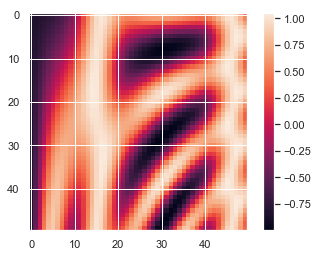

In [107]:
plt.imshow(z)
plt.colorbar() # Show z-scale
plt.show()

### Example 8: Plotting with meshgrid and contourf

* [numpy.meshgrid](https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html) can be used to generate matrices of x and y coordinates

In [18]:

x, y = np.meshgrid(np.linspace(0, 5, 50), np.linspace(0, 5, 50))

print(y)
z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.10204082 0.10204082 0.10204082 ... 0.10204082 0.10204082 0.10204082]
 [0.20408163 0.20408163 0.20408163 ... 0.20408163 0.20408163 0.20408163]
 ...
 [4.79591837 4.79591837 4.79591837 ... 4.79591837 4.79591837 4.79591837]
 [4.89795918 4.89795918 4.89795918 ... 4.89795918 4.89795918 4.89795918]
 [5.         5.         5.         ... 5.         5.         5.        ]]


* [`matplotlib.pyplot.contourf`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.contourf.html) can show contour plots
* Unlike `imshow`, the x/y coordinates are easy to specify

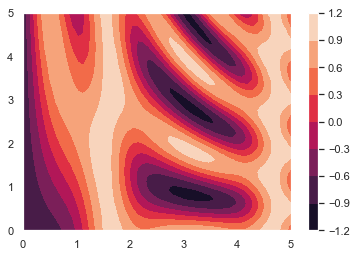

In [109]:
plt.contourf(x, y, z)
plt.colorbar() # Show z-scale
plt.show()

# Comparisons, Masks, and Boolean Logic

## Example 1: Counting Rainy Days

* We'll examine rainfall statistics for the city of Seattle in 2014.  
* The "PRCP" column shows has daily rainfall in 1/10 mm from January 1 through December 31, 2014.

In [110]:
!head -4 'Seattle2014.csv'

STATION,STATION_NAME,DATE,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,WSF2,WSF5,WT01,WT05,WT02,WT03
GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140101,0,0,0,72,33,12,340,310,36,40,-9999,-9999,-9999,-9999
GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140102,41,0,0,106,61,32,190,200,94,116,-9999,-9999,-9999,-9999
GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140103,15,0,0,89,28,26,30,50,63,72,1,-9999,-9999,-9999


## Example 1: Counting Rainy Days, cont.

In [111]:
conv = 254.0  # 1/10mm -> inches
rainfall = np.loadtxt('Seattle2014.csv', 
                  delimiter=',', 
                  skiprows=1,
                  usecols=3) / conv

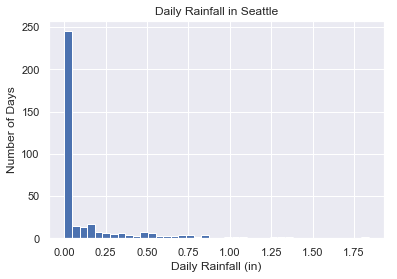

In [112]:
plt.hist(rainfall, 40);
plt.title('Daily Rainfall in Seattle')
plt.xlabel('Daily Rainfall (in)')
plt.ylabel('Number of Days')
plt.show()

## Example 1: More questions about the data

Let's define these categories
* Define "rainy" days as those with > 0.5 inch of rain.  Then get mean/median, etc.
* Define "rainless" days as those with < 0.5 inch of rain.  Ask how many there are, etc.

We can use other ufuncs to do element-wise **comparisons** over arrays, and we can then manipulate the results to answer the questions we have.

## Comparison Operators as ufuncs

NumPy implements comparison operators (``<``, ``>``, ``<=``, ``>=``, ``==``, ``!=``) as element-wise ufuncs.  The results are arrays of a **Boolean data type.**

In [113]:
x = np.array([1, 2, 3, 4, 5])
x < 3

array([ True,  True, False, False, False])

Also possible to do element-wise comparison of two arrays and compound expressions:

In [114]:
(2 * x) == (x ** 2)

array([False,  True, False, False, False])

## Comparison Operators with Multi-Dimensional Arrays

In [115]:
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [116]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

## Broadcasting with Comparisons

The normal broadcasting rules apply to comparisions

In [117]:
a = np.array([[1],
              [3],
              [5]])
b = np.array([2, 0, 4])

a < b

array([[ True, False,  True],
       [False, False,  True],
       [False, False, False]])

## Working with Boolean Arrays

In [118]:
print(x)

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]


* **``np.count_nonzero``** Returns the number of nonzero values

In [119]:
np.count_nonzero(x < 6)  # how many values less than 6?

8

* **``np.sum``**:  Since ``False`` is interpreted as ``0``, and ``True`` is interpreted as ``1``, we can also use ``np.sum``.  With ``sum``, we can also do the summation along rows or columns:

In [120]:
np.sum(x < 6)          # same as np.count_nonzero(x < 6)
np.sum(x < 6, axis=1)  # how many values less than 6 in each row?

array([4, 2, 2])

## Working with Boolean Arrays, cont.


**``np.any``** and **``np.all``**:  Check if any/all values are true

In [121]:
np.any(x < 8)  # are there any values greater than 8?

True

``np.all`` and ``np.any`` can be used along particular axes as well:

In [122]:
# are all values in each row less than 8?
np.all(x < 8, axis=1)

array([ True, False,  True])

## Boolean (Bitwise Logic) Operators

Python's bitwise logic operators (``&``, ``|``, ``^``, and ``~``) are also implemented as ufuncs.  These can be used for multi-conditional tests.  

In [125]:
# How many days had between 0.5 and 1 inches?
np.sum((rainfall > 0.5) & (rainfall < 1))  

29

Here, parenthesis are vital because ``&`` has greater precedence than ``<`` and ``>``.  Without parens, the expression would be evaluated as:

``` python
rainfall > (0.5 & rainfall) < 1
```

## Example 2: Questions about Rainfall with Bools

In [127]:
print("Number days without rain:      ", np.sum(rainfall == 0))
print("Number days with rain:         ", np.sum(rainfall != 0))
print("Days with more than 0.5 inches:", np.sum(rainfall > 0.5))
print("Rainy days with < 0.2 inches:  ", np.sum((rainfall > 0) &
                                                (rainfall < 0.2)))

Number days without rain:       215
Number days with rain:          150
Days with more than 0.5 inches: 37
Rainy days with < 0.2 inches:   75


## Boolean Arrays as Masks

* Boolean arrays can be used as **masks** to select **subsets of the data themselves**.  

* This shows a **masking** operation where:
  1. ``x < 5`` returns a $3 \times 5$ Boolean array.
  2. ``x[x < 5]`` uses the Boolean array as indices to return elements that for which the indices are ``True``.  

In [128]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [129]:
x[x < 5]

array([0, 3, 3, 3, 2, 4])

## Keeping Shape When Masking

* [`numpy.where(condition, x, y)`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.where.html) allows you to mask an array while keeping its shape.  
  - `condition` is a mask
  - Where mask is true, fill data from `x`
  - Where mask if false, fill data from `y`

In [130]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [131]:
np.where(x < 5, x, np.nan)

array([[nan,  0.,  3.,  3.],
       [nan, nan,  3., nan],
       [ 2.,  4., nan, nan]])

## Example 3:  Using Boolean Masks to Get Rainfall Info

In [132]:
# construct a mask of all rainy days
rainy = (rainfall > 0)

In [133]:
# construct a mask of all summer days (June 21st is the 172nd day)
days = np.arange(365)
summer = (days > 172) & (days < 262)

In [134]:
print("Median precip on rainy days in 2014 (inches):   ",
      np.median(rainfall[rainy]))
print("Median precip on summer days in 2014 (inches):  ",
      np.median(rainfall[summer]))
print("Maximum precip on summer days in 2014 (inches): ",
      np.max(rainfall[summer]))
print("Median precip on non-summer rainy days (inches):",
      np.median(rainfall[rainy & ~summer]))

Median precip on rainy days in 2014 (inches):    0.19488188976377951
Median precip on summer days in 2014 (inches):   0.0
Maximum precip on summer days in 2014 (inches):  0.8503937007874016
Median precip on non-summer rainy days (inches): 0.20078740157480315


# Boolean Keywords vs. Boolean Operators

## Boolean Keywords vs. Boolean Operators

(*Note: this discussion is based on Python stdlib docs, not VanderPlas*)

What's the difference between boolean operators (``and`` and ``or``) and the bitwise operators (``&`` and ``|``)?
* The boolean keywords return one operand in its entirety (https://docs.python.org/3/library/stdtypes.html#boolean-operations-and-or-not)
* Operators returns the result of a bitwise comparison (https://docs.python.org/3/library/stdtypes.html#bitwise-operations-on-integer-types)

## What `and`, `or`, and `not` do:

* The boolean keywords are based on the truth value of the operand as a whole
* In particular, whether the first operand is false


| Operation     | Result      |
|---------------|-------------|
| `x or y`      | if x is false, then y, else x |
| `x and y`     | if x is false, then x, else y |
| `not x`       | if x is false, then `True`, else `False`|

## Truth Values of Objects

An generic object is considered true unless its class defines either:
* A `__bool__()` method that returns `False`
* A `__len__()` method that returns zero

These built-in values are considered false:
* `None`
* `False`
* Zero of any numeric type:  `0`, `0.0`, `Decimal(0)`, `Fraction(0)`
* Empty sequences and collections:  `''`, `()`, `{}`, `set()`

Reference:  https://docs.python.org/3/library/stdtypes.html#truth-value-testing 

## Keywords vs. Operators for Integers

In [22]:
a = 0b101010
b = 0b110011

Since any non-zero integer is `True`, we have:

In [27]:
bin(a or b)

## return a 
## check for the first one always

'0b101010'

In [24]:
bin(a and b)

## return b

'0b110011'

Comparing bitwise, we have:

In [25]:
bin(a | b)

## bitwise

'0b111011'

In [139]:
bin(a & b)

'0b100010'

## Keywords vs. Operators for Lists

In [140]:
a = [True, False, True, False, True, False]
b = [True, True, False, False, True, True]

Since any non-empty list is true, we have:

In [141]:
a or b

[True, False, True, False, True, False]

In [142]:
a and b

[True, True, False, False, True, True]

## Keywords vs. Operators for Lists, cont.

In [143]:
a = [True, False, True, False, True, False]
b = [True, True, False, False, True, True]

However, bitwise comparisions aren't supported for lists...

In [144]:
a | b

TypeError: unsupported operand type(s) for |: 'list' and 'list'

A list comprehension could work:

In [145]:
[i | j for i, j in zip(a, b)]

[True, True, True, False, True, True]

## Keywords vs. Operators for Boolean Arrays

In [146]:
a = np.array([True, False, True, False, True, False])
b = np.array([True, True, False, False, True, True])

Bitwise comparisons are supported for NumPy arrays

In [147]:
a | b

array([ True,  True,  True, False,  True,  True])

In [148]:
a & b

array([ True, False, False, False,  True, False])

However, boolean comparisons are not supported

In [149]:
a or b

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()